# Linear Model in Python

In [146]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sb
import matplotlib.pyplot as plt 
import scipy.stats as scp

### NYC 2013-2017 ELA Test Results by Grade
This is a dataset of the English Language Arts test results of all students from third to eighth grade. Created by data.cityofnewyork.us, but grabbed from [data.gov](https://catalog.data.gov/dataset/2013-2017-ela-test-results-by-grade-school-all)

The question is weather district affects the percentage of students that are at grade level. Level 3 is considered proficient for their grade.

In [147]:
ELA_test_results = pd.read_csv('data/2013-2017_ELA_Test_Results_by_Grade_-_School_-_All.csv')
ELA_test_results['Level3+4_%'] = pd.to_numeric(ELA_test_results['Level3+4_%'], errors = 'coerce')
ELA_test_results['Level1_%'] = pd.to_numeric(ELA_test_results['Level1_%'], errors = 'coerce')
ELA_test_results['Level2_%'] = pd.to_numeric(ELA_test_results['Level2_%'], errors = 'coerce')
ELA_test_results['Level3_%'] = pd.to_numeric(ELA_test_results['Level3_%'], errors = 'coerce')
ELA_test_results['Level4_%'] = pd.to_numeric(ELA_test_results['Level4_%'], errors = 'coerce')

# ELA_test_results.head()


### 

In [148]:
ELA_test_results['District'] = ELA_test_results['DBN'].str[:2]
ELA_test_results['Borough'] = ELA_test_results['DBN'].str[2:3]
ELA_test_results['School Number'] = ELA_test_results['DBN'].str[3:]
ELA_test_results['District'] = pd.to_numeric(ELA_test_results['District'], errors = 'coerce')
ELA_test_results['School Number'] = pd.to_numeric(ELA_test_results['School Number'], errors = 'coerce')
ELA_test_results.head()


,DBN,School Name,Grade,Year,Category,Number Tested,Mean Scale Score,Level1_N,Level1_%,Level2_N,Level2_%,Level3_N,Level3_%,Level4_N,Level4_%,Level3+4_N,Level3+4_%,District,Borough,School Number
0,01M015,PS 015 ROBERTO CLEMENTE,3,2013,All Students,27,289,14,51.9,11,40.7,2,7.4,0,0.0,2,7.4,1,M,15
1,01M015,PS 015 ROBERTO CLEMENTE,3,2014,All Students,18,285,10,55.6,8,44.4,0,0.0,0,0.0,0,0.0,1,M,15
2,01M015,PS 015 ROBERTO CLEMENTE,3,2015,All Students,16,282,9,56.3,5,31.3,2,12.5,0,0.0,2,12.5,1,M,15
3,01M015,PS 015 ROBERTO CLEMENTE,3,2016,All Students,20,293,10,50.0,6,30.0,4,20.0,0,0.0,4,20.0,1,M,15
4,01M015,PS 015 ROBERTO CLEMENTE,3,2017,All Students,27,302,10,37.0,8,29.6,7,25.9,2,7.4,9,33.3,1,M,15


The district only shows a small percentage of correlation across all levels of proficiency at about 3%.

In [149]:
# Code block 3: The linear model
Y = ELA_test_results['District']
X = ELA_test_results[['Level1_%', 'Level2_%', 'Level3_%', 'Level4_%']]
X = sm.add_constant(X)
model0 = sm.OLS(Y, X, missing='drop').fit()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:               District   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     180.6
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          1.03e-152
Time:                        14:54:36   Log-Likelihood:                -87119.
No. Observations:               23939   AIC:                         1.742e+05
Df Residuals:                   23934   BIC:                         1.743e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        162.7610    102.874      1.582      0.1

/Users/michaelsmith/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [150]:
ELA_test_results['Borough']
ELA_pivoted = ELA_test_results.pivot_table(ELA_test_results, index=['DBN'])
ELA_pivoted
# ELA_test_results = pd.get_dummies(ELA_test_results, columns=['Borough'], drop_first=True)

,District,Level1_%,Level2_%,Level3+4_%,Level3_%,Level4_%,Number Tested,School Number,Year
DBN,,,,,,,,,
01M015,1,43.535000,42.635000,13.845000,12.710000,1.130000,30.800000,15,2015.000000
01M019,1,21.825000,39.795000,38.380000,29.230000,9.155000,48.500000,19,2015.000000
01M020,1,36.335000,37.620000,26.060000,20.185000,5.880000,112.300000,20,2015.000000
01M034,1,30.511429,46.448571,23.034286,19.491429,3.534286,70.571429,34,2015.000000
01M063,1,29.280000,36.980000,33.740000,27.230000,6.510000,27.400000,63,2015.000000
...,...,...,...,...,...,...,...,...,...
32K377,32,52.051429,37.577143,10.382857,9.548571,0.825714,84.800000,377,2015.000000
32K383,32,9.612000,37.704000,52.684000,36.400000,16.276000,345.440000,383,2015.000000
32K384,32,36.122857,40.188571,23.685714,18.671429,5.014286,104.571429,384,2015.000000


When pivoted to average the levels for a school across all years, the District correlation increases only slightly to 4.9%.

In [151]:
Y = ELA_pivoted['District']
X = ELA_pivoted[['Level1_%', 'Level2_%', 'Level3_%', 'Level4_%']]
X = sm.add_constant(X)
model0 = sm.OLS(Y, X, missing='drop').fit()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:               District   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     14.56
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           1.34e-11
Time:                        14:54:36   Log-Likelihood:                -4125.2
No. Observations:                1138   AIC:                             8260.
Df Residuals:                    1133   BIC:                             8286.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2079.8423   2007.043      1.036      0.3

/Users/michaelsmith/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


A linear visual model is probably not the best for this particular data set as the change in District number doesn't really correspond to the change in level.

/Users/michaelsmith/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


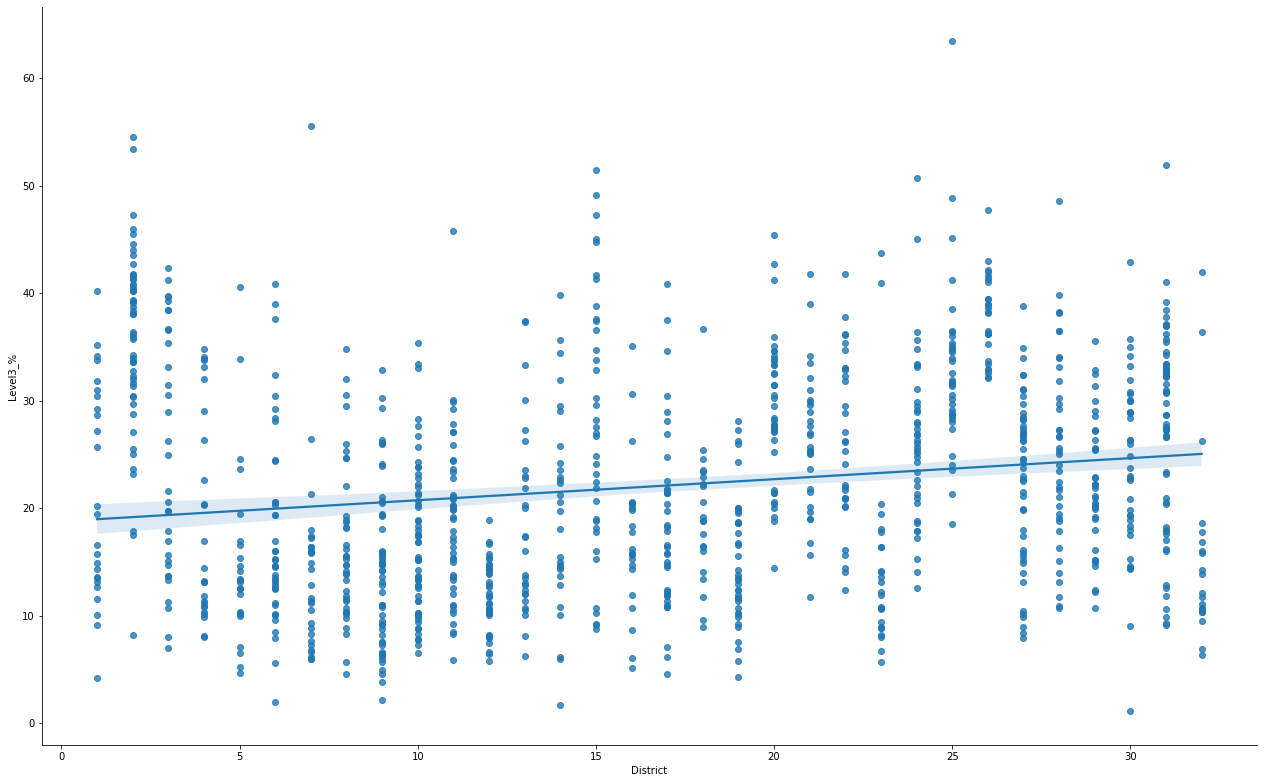

In [152]:
p = sb.lmplot('District', 'Level3_%', data=ELA_pivoted)
p.fig.set_figwidth(20)
p.fig.set_figheight(12)
plt.show()

A box plot that allows you to see the range of values for each district seems to be a better visualization.

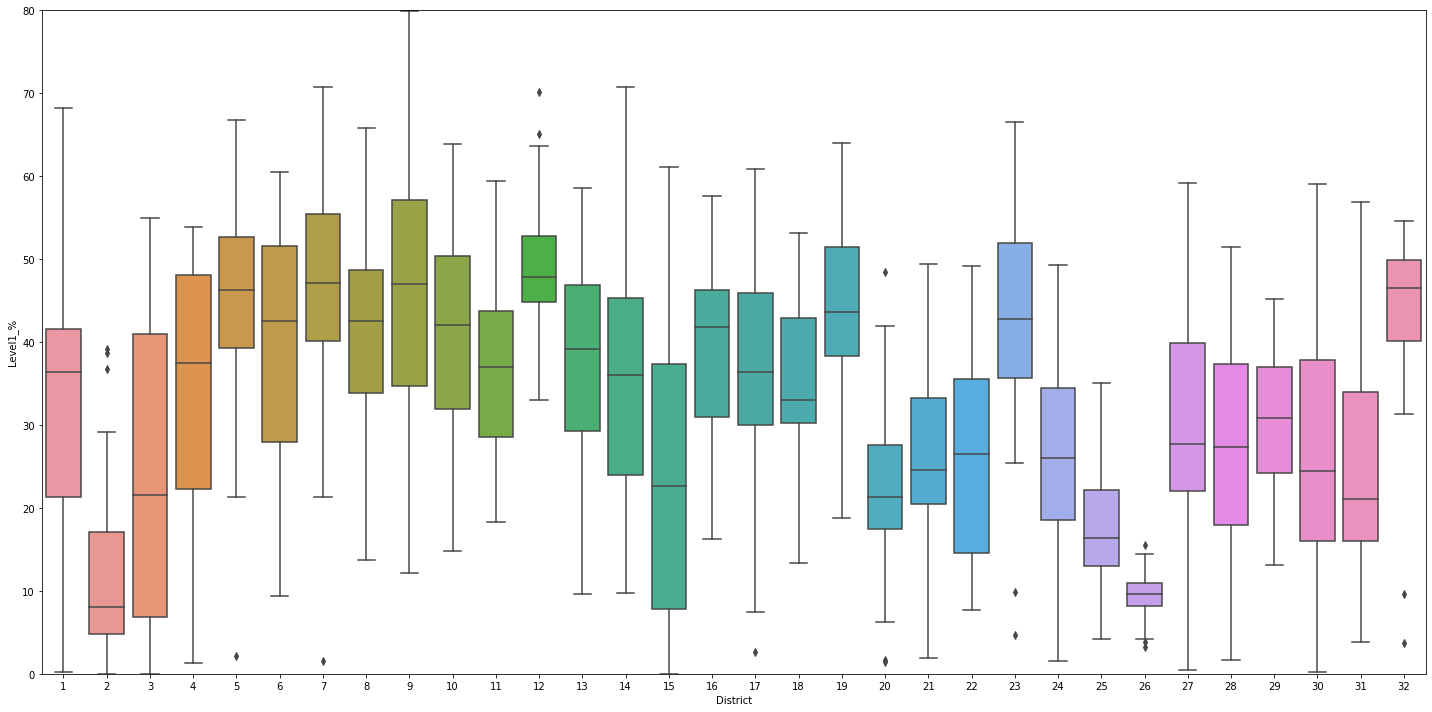

In [158]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

f = plt.figure(figsize=[20,10])
ax = f.add_subplot(111)
sns.boxplot(x='District', y='Level1_%', data=ELA_pivoted,  ax=ax)
plt.ylim(0, 80)
f.tight_layout()

Level 1 proficiency have students performing well below grade level. There are eight districts with the third quartile entering 50% or above. There are only four districts any of the first to third quartile below 10%.

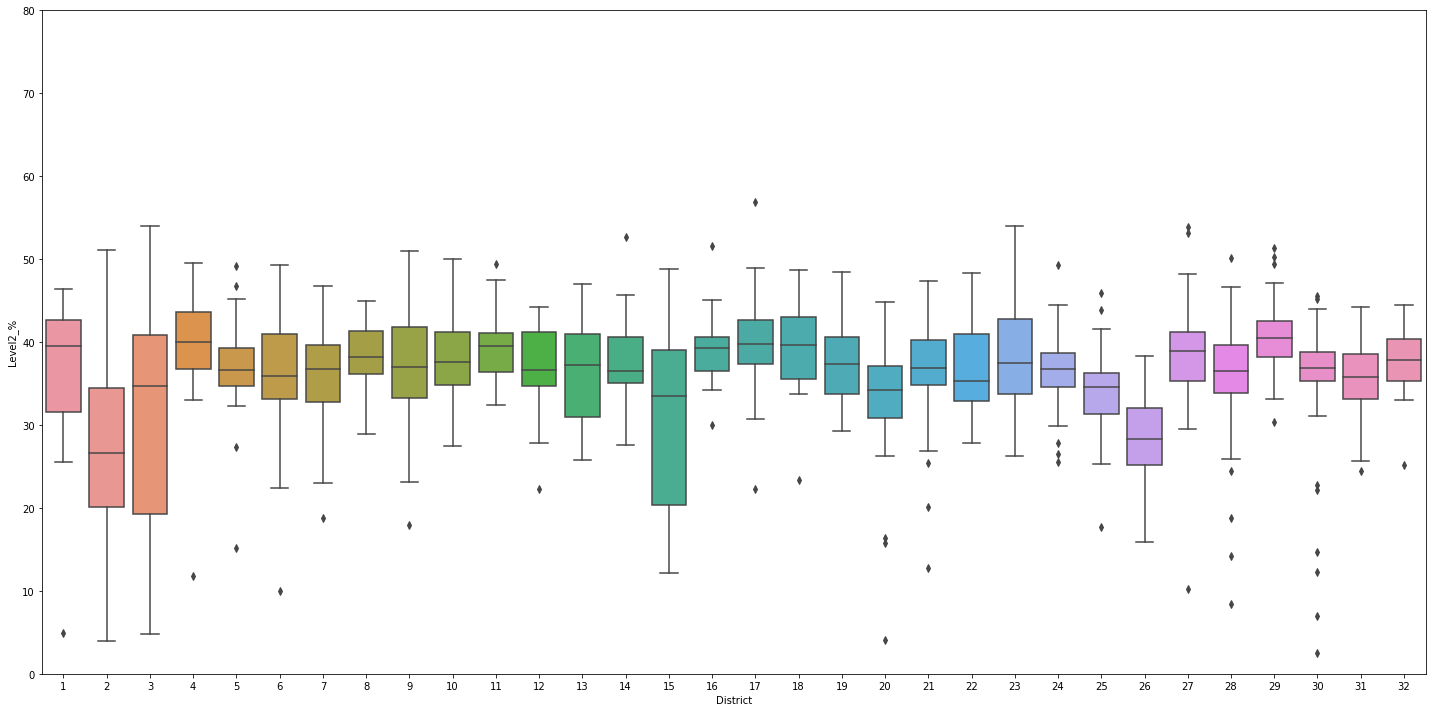

In [159]:
f = plt.figure(figsize=[20,10])
ax = f.add_subplot(111)
sns.boxplot(x='District', y='Level2_%', data=ELA_pivoted,  ax=ax)
plt.ylim(0, 80)
f.tight_layout()

Level 2 Proficiency have students that are partially proficient in standards for their grade. Only five districts have the first through third quartile below 40%.

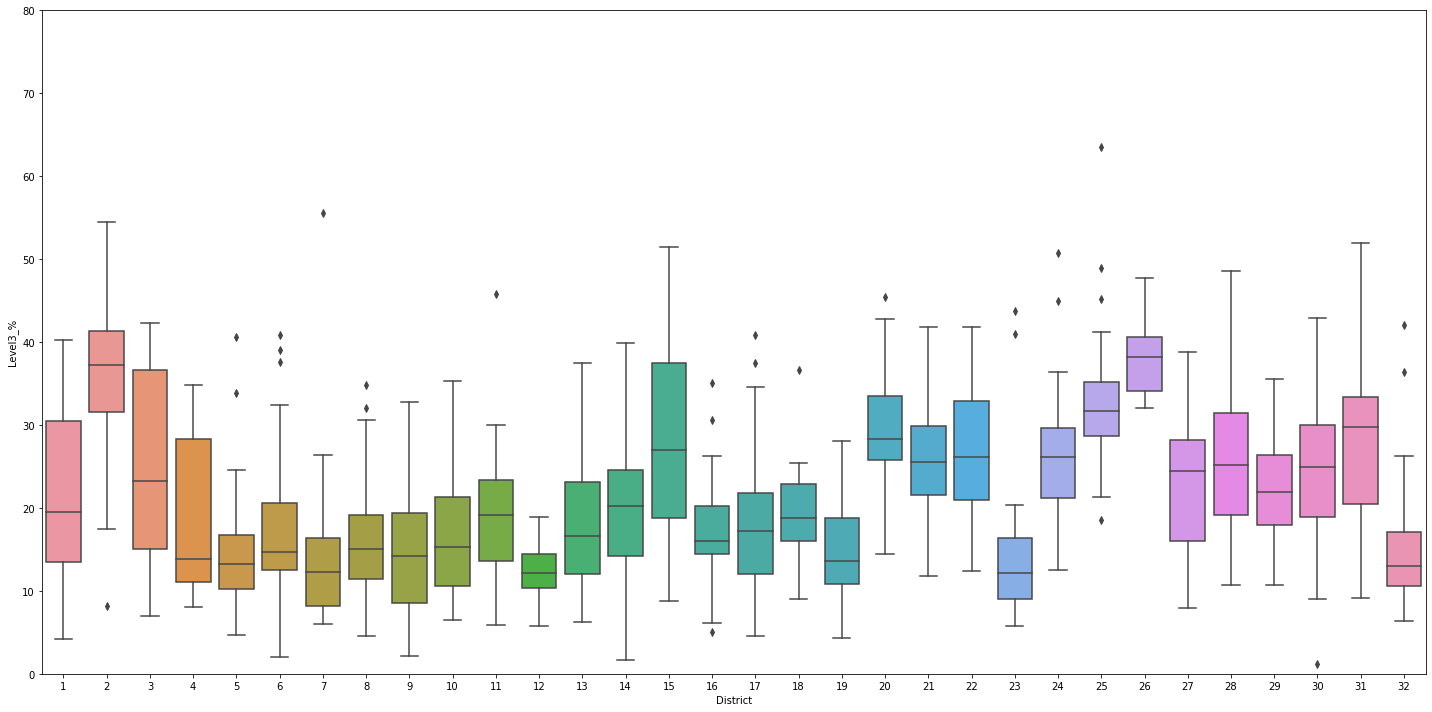

In [160]:
f = plt.figure(figsize=[20,10])
ax = f.add_subplot(111)
sns.boxplot(x='District', y='Level3_%', data=ELA_pivoted,  ax=ax)
plt.ylim(0, 80)
f.tight_layout()

Level 3 Proficiency have students performing at a proficient level for their grade. Only two districts have 40% of their students in the third quartile.

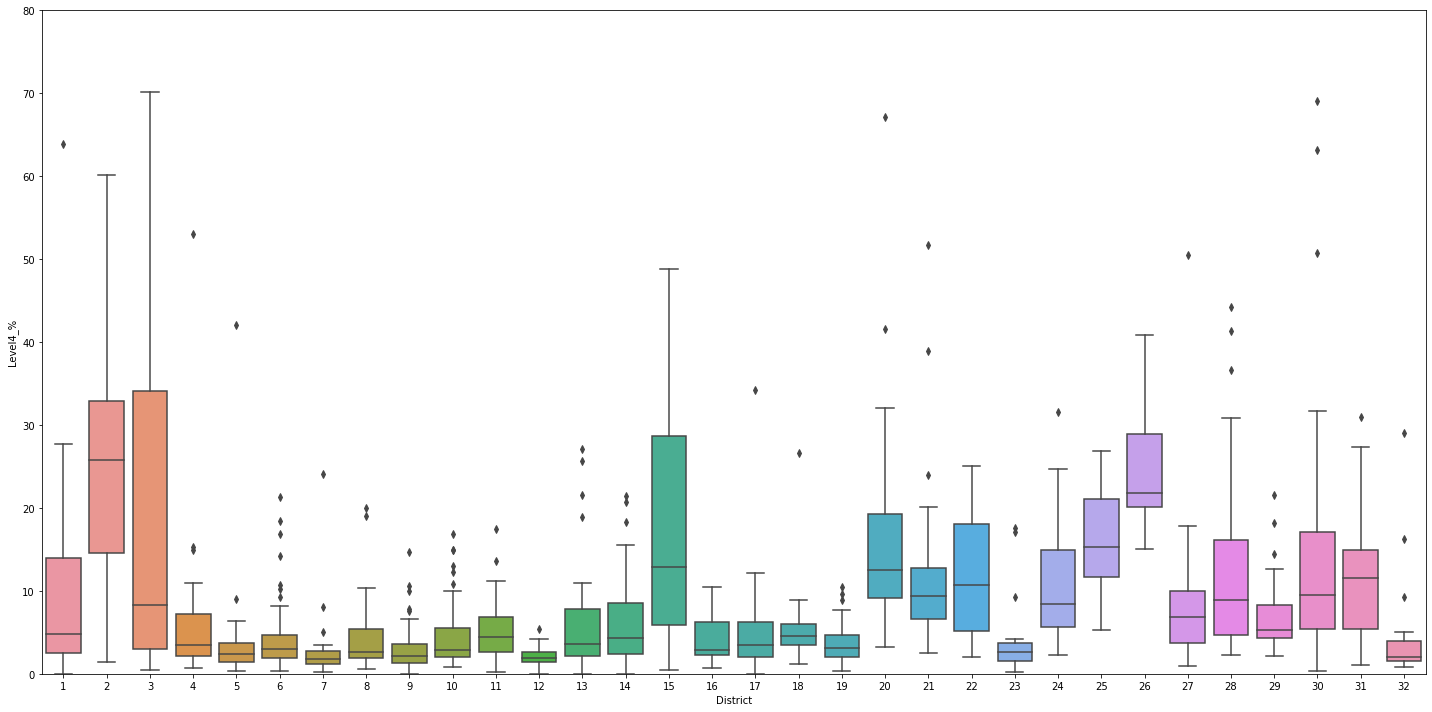

In [161]:
f = plt.figure(figsize=[20,10])
ax = f.add_subplot(111)
sns.boxplot(x='District', y='Level4_%', data=ELA_pivoted,  ax=ax)
plt.ylim(0, 80)
f.tight_layout()

Level 4 Proficiency have students performing at level exceling in standards for their grade. Only three districts have their first through third quartile above 10%.